Still working on this code. 

In [ ]:
#Mounting Google Drive to load data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Imported all the libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
#Loaded data from excel file into pandas dataframe df
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Data/bms038.xlsx')

In [ ]:
df

,Unnamed: 0,Pt101_On,Pt101_Pre,Pt103_On,Pt103_Pre,Pt105_On,Pt106_On,Pt106_Pre,Pt108_On,Pt109_On,...,Pt92_Pre,Pt92_Pre.2,Pt93_On,Pt94_On,Pt94_Pre,Pt98_On,Pt98_Pre,Pt9_On,Pt9_Pre,HUGO
0,1,251,279,661,1124,201,243,290,352,175,...,76,116,244,6387,278,229,278,236,156,A1BG
1,10,6,0,0,0,0,1,3,2,0,...,0,2,0,561,1,0,0,11,9,NAT2
2,100,2085,1630,136,1069,842,573,800,188,329,...,695,828,117,249,523,400,212,398,345,ADA
3,1000,536,228,3,23,92,2581,3114,618,71,...,557,1135,56,1686,161,139,190,6957,4990,CDH2
4,10000,3156,2485,5644,1337,5520,7594,9432,629,1712,...,5244,6730,8592,2678,4953,6898,5735,8434,7804,AKT3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22328,9991,12483,9871,3941,1854,5050,2696,5000,3116,2513,...,4624,5537,9539,2415,3709,5178,3884,4285,4213,PTBP3
22329,9992,6,9,8,0,88,16,20,39,29,...,27,12,24,18,13,18,13,19,29,KCNE2
22330,9993,3820,3251,7263,1706,3727,2668,3473,2235,4764,...,4544,4153,3545,2491,2655,2127,2531,3546,2875,DGCR2
22331,9994,2803,2428,842,242,1202,644,1252,689,578,...,1229,1525,1226,526,799,691,657,1336,1257,CASP8AP2


In [ ]:
#Loaded y dataset from excel file into pandas dataframe df2
df2 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Data/mmc2.xlsx', index_col='Patient')
df2

,Cohort,Response,Result,Time to Death\n(weeks),Subtype,Mutational\n Subtype,M Stage,Mutation Load,Neo-antigen Load,Neo-peptide Load,Cytolytic Score
Patient,,,,,,,,,,,
Pt1,NIV3-PROG,PD,True,22.857143,CUTANEOUS,NaN,M1C,NaN,NaN,NaN,977.869112
Pt10,NIV3-NAIVE,SD,True,36.571429,CUTANEOUS,NF1,M1A,75.0,33.0,56.0,65.840717
Pt100,NIV3-PROG,PD,True,120.000000,OTHER,TripleWt,M1C,6.0,5.0,6.0,NaN
Pt101,NIV3-PROG,PR,False,119.142857,CUTANEOUS,TripleWt,M1A,10.0,5.0,6.0,1392.142234
Pt102,NIV3-NAIVE,SD,False,90.857143,CUTANEOUS,RAS,NaN,393.0,248.0,770.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
Pt90,NIV3-PROG,PD,True,24.857143,MUCOSAL,TripleWt,M1C,283.0,162.0,302.0,1006.518753
Pt92,NIV3-PROG,SD,True,47.571429,CUTANEOUS,RAS,UNKNOWN,642.0,388.0,1086.0,1562.971529
Pt93,NIV3-PROG,PD,False,121.285714,CUTANEOUS,TripleWt,M1C,7.0,1.0,1.0,NaN


In [ ]:
#Selected Result column which contains Dead or Alive information for patients
#df_y = df2[['Result']]
#Selected Response column which contains information about patients response and tumor status
df_y = df2[['Response']]
df_y

,Response
Patient,
Pt1,PD
Pt10,SD
Pt100,PD
Pt101,PR
Pt102,SD
...,...
Pt90,PD
Pt92,SD
Pt93,PD


In [ ]:
#1= PD (Progressive Disease) or PR (Partial Response), 0 = CR (Complete Response) or SD (Stable Disease)
df_y = df_y['Response'].apply(lambda i: 1 if i == 'PD' or i == 'SD' else 0)
df_y

Patient
Pt1      1
Pt10     1
Pt100    1
Pt101    0
Pt102    1
        ..
Pt90     1
Pt92     1
Pt93     1
Pt94     0
Pt98     1
Name: Response, Length: 73, dtype: int64

In [ ]:
#Selecting pre-treatment (rows) gene expressions from patients
df_filtr = df.filter(regex='_Pre')
#df_filtr = df.filter(regex='_On')

In [ ]:
#Switched the rows and columns to patients and gene expressions
df_trans = df_filtr.transpose()

In [ ]:
print(df_trans)

            0      1      2      3      4      5      6      7      8      \
Pt101_Pre     279      0   1630    228   2485     74   1191      0     19   
Pt103_Pre    1124      0   1069     23   1337    145    484      0     87   
Pt106_Pre     290      3    800   3114   9432    163   1185      7    114   
Pt10_Pre      306      0    982    338  21878    196    706     11    136   
Pt11_Pre      108      0    431     69   5107    182    907      7     91   
Pt17_Pre      179      0    246     36   1481    152   1049      1     19   
Pt18_Pre      145      0   1162   3689   5479    166    906      1     42   
Pt1_Pre       436      0    565     71   6838    242   1045      1     30   
Pt23_Pre      150      4    750   4947   3819    278    563     10     79   
Pt24_Pre      166      0    384    297   2015     62    886      4     71   
Pt26_Pre      138      0     62    167   9882    198   1167      7     74   
Pt27_Pre      187      0     61   1869   6522     89    644     11     42   

In [ ]:
df_y

Patient
Pt1      1
Pt10     1
Pt100    1
Pt101    0
Pt102    1
        ..
Pt90     1
Pt92     1
Pt93     1
Pt94     0
Pt98     1
Name: Response, Length: 73, dtype: int64

In [ ]:
#Converted True and False strings into integers 1 and 0
#df_y['Result'] = df_y['Result'].astype(int)
#df_y

In [ ]:
#Check the differences between the indexes df_trans (X) and df_y (y) to merge them into a single dataframe
df_y.index

Index(['Pt1', 'Pt10', 'Pt100', 'Pt101', 'Pt102', 'Pt103', 'Pt104', 'Pt106',
       'Pt108', 'Pt11', 'Pt13', 'Pt17', 'Pt18', 'Pt2', 'Pt23', 'Pt24', 'Pt25',
       'Pt26', 'Pt27', 'Pt28', 'Pt29', 'Pt3', 'Pt30', 'Pt31', 'Pt32', 'Pt34',
       'Pt36', 'Pt37', 'Pt38', 'Pt39', 'Pt4', 'Pt44', 'Pt46', 'Pt47', 'Pt48',
       'Pt49', 'Pt5', 'Pt51', 'Pt52', 'Pt53', 'Pt54', 'Pt58', 'Pt59', 'Pt60',
       'Pt62', 'Pt65', 'Pt66', 'Pt67', 'Pt68', 'Pt7', 'Pt70', 'Pt71', 'Pt72',
       'Pt73', 'Pt74', 'Pt76', 'Pt77', 'Pt78', 'Pt79', 'Pt8', 'Pt82', 'Pt83',
       'Pt84', 'Pt85', 'Pt86', 'Pt87', 'Pt89', 'Pt9', 'Pt90', 'Pt92', 'Pt93',
       'Pt94', 'Pt98'],
      dtype='object', name='Patient')

In [ ]:
df_trans.index

Index(['Pt101_Pre', 'Pt103_Pre', 'Pt106_Pre', 'Pt10_Pre', 'Pt11_Pre',
       'Pt17_Pre', 'Pt18_Pre', 'Pt1_Pre', 'Pt23_Pre', 'Pt24_Pre', 'Pt26_Pre',
       'Pt27_Pre', 'Pt28_Pre', 'Pt29_Pre', 'Pt2_Pre', 'Pt30_Pre', 'Pt31_Pre',
       'Pt34_Pre', 'Pt36_Pre', 'Pt37_Pre', 'Pt37_Pre.2', 'Pt38_Pre',
       'Pt39_Pre', 'Pt3_Pre', 'Pt3_Pre.2', 'Pt44_Pre', 'Pt46_Pre', 'Pt47_Pre',
       'Pt48_Pre', 'Pt49_Pre', 'Pt4_Pre', 'Pt52_Pre', 'Pt59_Pre', 'Pt5_Pre',
       'Pt5_Pre.2', 'Pt62_Pre', 'Pt65_Pre', 'Pt66_Pre', 'Pt67_Pre', 'Pt72_Pre',
       'Pt76_Pre', 'Pt77_Pre', 'Pt78_Pre', 'Pt78_Pre.2', 'Pt79_Pre',
       'Pt82_Pre', 'Pt84_Pre', 'Pt85_Pre', 'Pt89_Pre', 'Pt8_Pre', 'Pt90_Pre',
       'Pt92_Pre', 'Pt92_Pre.2', 'Pt94_Pre', 'Pt98_Pre', 'Pt9_Pre'],
      dtype='object')

In [ ]:
#Replace _Pre with emptu/nul string
from re import RegexFlag
df_trans.index = df_trans.index.str.replace(r'_Pre', '', regex= True)
#df_trans.index = df_trans.index.str.replace(r'_On', '', regex= True)
df_trans.index

Index(['Pt101', 'Pt103', 'Pt106', 'Pt10', 'Pt11', 'Pt17', 'Pt18', 'Pt1',
       'Pt23', 'Pt24', 'Pt26', 'Pt27', 'Pt28', 'Pt29', 'Pt2', 'Pt30', 'Pt31',
       'Pt34', 'Pt36', 'Pt37', 'Pt37.2', 'Pt38', 'Pt39', 'Pt3', 'Pt3.2',
       'Pt44', 'Pt46', 'Pt47', 'Pt48', 'Pt49', 'Pt4', 'Pt52', 'Pt59', 'Pt5',
       'Pt5.2', 'Pt62', 'Pt65', 'Pt66', 'Pt67', 'Pt72', 'Pt76', 'Pt77', 'Pt78',
       'Pt78.2', 'Pt79', 'Pt82', 'Pt84', 'Pt85', 'Pt89', 'Pt8', 'Pt90', 'Pt92',
       'Pt92.2', 'Pt94', 'Pt98', 'Pt9'],
      dtype='object')

In [ ]:
!pip install conorm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for conorm: filename=conorm-1.2.0-py3-none-any.whl size=5796 sha256=030d6dd58b12c64954a58c7c38f9566b0bedcc25b215c8f77ce970f1474a7d8b
  Stored in directory: /root/.cache/pip/wheels/a7/25/73/bdce0ed3297f69f7036c492787ae3b5afafd3d6f9c20b00762
Successfully built conorm


In [ ]:
import conorm

In [ ]:
#Dropped NaN
df_trans = df_trans.dropna(axis = 0)
print(df_trans)

        0      1      2      3      4      5      6      7      8      9      \
Pt101     279      0   1630    228   2485     74   1191      0     19      0   
Pt103    1124      0   1069     23   1337    145    484      0     87      0   
Pt106     290      3    800   3114   9432    163   1185      7    114      0   
Pt10      306      0    982    338  21878    196    706     11    136      0   
Pt11      108      0    431     69   5107    182    907      7     91      8   
Pt17      179      0    246     36   1481    152   1049      1     19      0   
Pt18      145      0   1162   3689   5479    166    906      1     42      7   
Pt1       436      0    565     71   6838    242   1045      1     30      0   
Pt23      150      4    750   4947   3819    278    563     10     79      0   
Pt24      166      0    384    297   2015     62    886      4     71      0   
Pt26      138      0     62    167   9882    198   1167      7     74      4   
Pt27      187      0     61   1869   652

In [ ]:
#df_normalized = conorm.tmm(df_trans, trim_lfc=0.3, trim_mag=0.05, index_ref=None, return_norm_factors=False)
#when p = 47, roc was 0.52
#df_normalized = conorm.percentile(df_trans.transpose, p=69).transpose
df_normalized = conorm.mrn(df_trans.transpose()).transpose()

In [ ]:
df_normalized = df_normalized.dropna(axis=1)

In [ ]:
#Merged y dataset to X dataset
merged_df = df_normalized.join(df_y)
merged_df

,0,1,2,3,4,5,6,7,8,9,...,22324,22325,22326,22327,22328,22329,22330,22331,22332,Response
Pt101,240.307209,0.000000,1403.945341,196.380085,2140.370658,63.737396,1025.827547,0.000000,16.365007,0.000000,...,3227.351652,1626.164910,1179.141823,3981.003292,8502.051817,7.751845,2800.138837,2091.275637,10.335794,0.0
Pt103,1551.462254,0.000000,1475.545506,31.747003,1845.467111,200.144152,668.067376,0.000000,120.086491,0.000000,...,1262.978614,2523.196619,1683.971485,546.600580,2559.084536,0.000000,2354.799470,334.033688,40.028830,1.0
Pt106,220.067248,2.276558,607.082063,2363.066931,7157.497524,123.692970,899.240306,5.311968,86.509194,0.000000,...,3861.800774,2127.822631,15416.848994,855.985709,3794.262895,15.177052,2635.495007,950.083429,4.553115,1.0
Pt10,181.648776,0.000000,582.938230,200.644727,12987.293896,116.350197,419.098158,6.529858,80.732790,0.000000,...,3746.951233,3824.715905,723.033365,987.195802,6597.531052,9.497975,4178.515483,1076.832943,0.000000,1.0
Pt11,92.739434,0.000000,370.099039,59.250194,4385.373064,156.283121,778.839508,6.010889,78.141560,6.869588,...,3036.357774,4165.546257,16503.325811,1723.407820,6864.435534,26.619652,2418.953578,1354.167480,0.858698,1.0
Pt17,175.161129,0.000000,240.724233,35.227936,1449.238164,148.740176,1026.502927,0.978554,18.592522,0.000000,...,2261.437811,2440.513154,36776.008566,982.468006,12010.769228,94.919718,3096.144194,1839.681127,0.978554,1.0
Pt18,128.602561,0.000000,1030.594318,3271.826541,4859.402986,147.227760,803.544279,0.886914,37.250397,6.208400,...,2346.775014,2093.117548,1444.783257,4301.533945,5920.152388,8.869142,1793.340544,1576.933475,0.000000,0.0
Pt1,398.147232,0.000000,515.947675,64.835903,6244.336638,220.989978,954.274903,0.913182,27.395452,0.000000,...,2349.616580,4114.796855,6389.532533,1574.325295,4695.580432,21.916361,2924.921067,1475.701668,7.305454,1.0
Pt23,140.902350,3.757396,704.511750,4646.959506,3587.373833,261.139022,528.853487,9.393490,74.208571,0.000000,...,1790.399195,2984.311775,3124.274776,2807.714163,4956.005327,46.967450,4780.347064,1124.400754,6.575443,0.0
Pt24,202.961639,0.000000,469.501623,363.130162,2463.660862,75.804950,1083.277183,4.890642,86.808894,0.000000,...,1832.768056,3723.001154,681.021886,3128.788162,10666.490006,7.335963,1557.669448,1525.880276,0.000000,1.0


In [ ]:
merged_df = merged_df.dropna()

In [ ]:
#df_normalized = conorm.tmm(merged_df.drop('Response', axis = 1).values, trim_lfc=0.3, trim_mag=0.05, index_ref=None, return_norm_factors=False)
#df_normalized = conorm.mrn(merged_df.drop('Response', axis = 1).values)

In [ ]:
#Assigned X = all rows, all columns except the last and y = all rows, last column
X = merged_df.iloc[:, 0:-1].values
y = merged_df.iloc[:, -1:].values

In [ ]:
#Checked the dimensions of X
X.shape

(51, 22333)

In [ ]:
#Checked the dimensions of y
y.shape

(51, 1)

In [ ]:
y

array([[0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.]])

In [ ]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 101)

In [ ]:
#Created test and train sets
#from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

#Import StratifiedKFold from sklearn.model_selection
from sklearn.model_selection import StratifiedKFold, cross_val_score
import pickle
from sklearn.metrics import RocCurveDisplay
#imported standard scaling library called StandardScaler, MinMaxScaler, MaxAbsScaler  to scale/Normalize the data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
#import Logisitic Regression library 
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

In [ ]:
from sklearn import feature_selection
#Created an instance of Logistic Regression and LogisticRegressionCV
#log_reg = LogisticRegression()
#Cs =  np.logspace(-4,-1,10)
#l1_ratios = np.linspace(0.6,1,10)  
#log_reg = LogisticRegressionCV(Cs=np.logspace(-4,-1,10), l1_ratios=np.linspace(0.6,1,10), penalty='elasticnet', scoring='roc_auc', class_weight='balanced', max_iter=1e4, tol=1e-4, solver='saga', n_jobs=-1)
feature_selection = LogisticRegressionCV(Cs=[0.1, 0.25, 0.01, 0.001,], l1_ratios=[0.60, 0.70, 0.85,0.90, 0.95],penalty='elasticnet', scoring='roc_auc', cv=3, class_weight='balanced', max_iter=1e3, tol=1e-3, solver='saga', n_jobs=-1)
##############log_reg = LogisticRegression(penalty='none', class_weight='balanced', max_iter=1e4, tol=1e-4)
#feature_selection = LogisticRegressionCV(Cs, l1_ratios, penalty='elasticnet', scoring='roc_auc', cv=3, class_weight='balanced', max_iter=1e3, tol=1e-3, solver='saga', n_jobs=-1)

In [ ]:
#Created Standard Scaler instance
sc = StandardScaler()
#sc = MinMaxScaler()
#sc = MaxAbsScaler()

X Train (34, 22333)
y Train (34, 1)
X Test (17, 22333)
y Test (17, 1)
Coef = [  216  1208  1243  1350  1773  2332  2607  3981  4579  5206  5207  5954
  6664  8132  8728 11054 16753 20524 20615]
/content/drive/MyDrive/Colab Notebooks/Data/logistic_reg_0.sav
/content/drive/MyDrive/Colab Notebooks/Data/feature_selec_0.sav
X Train (34, 22333)
y Train (34, 1)
X Test (17, 22333)
y Test (17, 1)
Coef = [  111   905  1242  3878  5644  6036  9837 10022 10127 10756 10967 11862
 13848 13949 15208 17618 19677 19909 20264 21533]
/content/drive/MyDrive/Colab Notebooks/Data/logistic_reg_1.sav
/content/drive/MyDrive/Colab Notebooks/Data/feature_selec_1.sav
X Train (34, 22333)
y Train (34, 1)
X Test (17, 22333)
y Test (17, 1)
Coef = [   32   423  1762  3183  3375  4307  5443  5861  5970  6389  6727  8280
  9290  9763 10012 10328 10991 14861 17755 17937 20461 20496 21609 21990]
/content/drive/MyDrive/Colab Notebooks/Data/logistic_reg_2.sav
/content/drive/MyDrive/Colab Notebooks/Data/feature_selec_2.sav


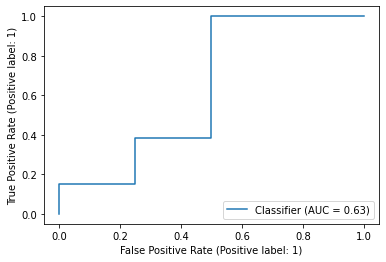

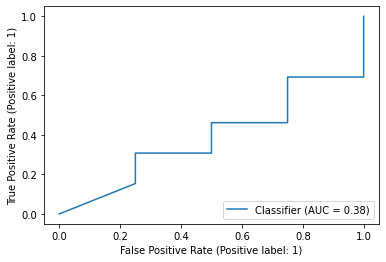

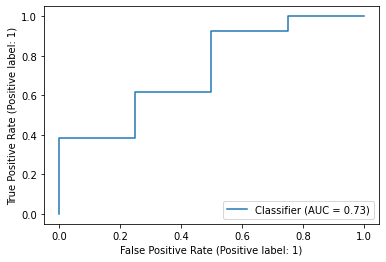

In [ ]:
#Split dataset 5 times to create X and y pairs train and test sets.
train_test_splits_skf = StratifiedKFold(n_splits=3, random_state=0, shuffle=True)  
train_test_splits_skf.get_n_splits(X, y)
i = 0


for train_index, test_index in train_test_splits_skf.split(X, y.ravel()):
    x_train_fold, x_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    
    #Scaling using StandardScalar
    x_train_fold[:,:] = sc.fit_transform(x_train_fold[:,:])
    x_test_fold[:,:] = sc.transform(x_test_fold[:,:])
    
    #finding coefs/features
    print(f"X Train {x_train_fold.shape}")
    print(f"y Train {y_train_fold.shape}")
    print(f"X Test {x_test_fold.shape}")
    print(f"y Test {y_test_fold.shape}")

    #log_reg.fit(X_train, y_train.ravel())
    feature_selection.fit(x_train_fold, y_train_fold.ravel())
    #print(f"Coef-Shape {feature_selection.coef_.shape}")
   
   
   #finding nonzero coefs/features
    coefs = np.where(feature_selection.coef_ != 0.)[1]
    print(f"Coef = {coefs}")
    if len(coefs)==0:
      y_pred = np.ones(y_test)
      print(y_pred)
    else:
      log_reg = LogisticRegression(penalty='none', class_weight='balanced', max_iter=1e6, tol=1e-6)
      log_reg.fit(x_train_fold[:, coefs], y_train_fold.ravel())
      y_pred = log_reg.predict_proba(X_test[:,coefs])[:,1]
    
    #Saving the Model #Create empty file on computer
    filename_log_reg = "/content/drive/MyDrive/Colab Notebooks/Data/logistic_reg_%s.sav" %i
    print(filename_log_reg)
    filename_feature_selec = "/content/drive/MyDrive/Colab Notebooks/Data/feature_selec_%s.sav" %i
    print(filename_feature_selec)

    #Dump log_reg into file using write block method (wb)
    pickle.dump(log_reg, open(filename_log_reg, 'wb'))
    pickle.dump(feature_selection, open(filename_feature_selec, 'wb'))
    i += 1

    #Loading the model from filename
    loaded_model = pickle.load(open(filename_log_reg, 'rb'))
    prediction_prob = loaded_model.predict_proba(x_test_fold[:, coefs])
    prediction = loaded_model.predict(x_test_fold[:, coefs])
    RocCurveDisplay.from_predictions(y_test_fold, prediction_prob[:, :1])

In [ ]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(40, 22333)
(40, 1)
(11, 22333)
(11, 1)


In [ ]:
#imported standard scaling library called StandardScaler, MinMaxScaler, MaxAbsScaler  to scale/Normalize the data
#from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
#Created Standard Scaler instance
#sc = StandardScaler()
#sc = MinMaxScaler()
#sc = MaxAbsScaler()

#X_scaled = sc.fit_transform(X)
#X_train[:,:] = sc.fit_transform(X_train[:,:])
#X_test[:,:] = sc.transform(X_test[:,:])

In [ ]:
#print(X_test)

In [ ]:
#import Logisitic Regression library 
#from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

In [ ]:
#Feature_Selection, finding the top 10 most expressed genes
#feature_selection = LogisticRegressionCV(Cs=[0.1,0.05,0.01], l1_ratios=[0.65,0.85,0.95],penalty='elasticnet', scoring='roc_auc', cv=3, class_weight='balanced', max_iter=1e3, tol=1e-3, solver='saga', n_jobs=-1)
#feature_selection.fit(X_train, y_train.ravel())

In [ ]:
#feature_selection.coef_.shape

In [ ]:
#np.where(feature_selection.coef_ !=0.)[1]

In [ ]:
#log_reg.fit(X_train, y_train.ravel())
#feature_selection.fit(X_train, y_train.ravel())

In [ ]:
#np.where(feature_selection.coef_ != 0.)[1]

In [ ]:
#coefs = np.where(feature_selection.coef_ != 0.)[1]

In [ ]:
#log_reg.fit(X_train[:, coefs], y_train.ravel())

In [ ]:
#log_reg.coef_

In [ ]:
#y.shape

In [ ]:
#X.shape

In [ ]:
#print(X_test.shape)
#print(y_test.shape)

In [ ]:
#print(X_train[:, coefs].shape)
#print(y_train.shape)

In [ ]:
#Creating a logistic regression model using the most expressed genes
#log_reg.fit(X_train[:, coefs], y_train.ravel())

In [ ]:
#Saving the Model #Create empty file on computer
#filename_log_reg = "/content/drive/MyDrive/Colab Notebooks/Data/logistic_reg_11_19_2022.sav" 
#print(filename_log_reg)
#filename_feature_selec = "/content/drive/MyDrive/Colab Notebooks/Data/feature_selec_11_19_2022.sav" 
#print(filename_feature_selec)

In [ ]:
#Dump log_reg into file using write block method (wb)
#pickle.dump(log_reg, open(filename_log_reg, 'wb'))
#pickle.dump(feature_selection, open(filename_feature_selec, 'wb'))

In [ ]:
#Loading the model from filename
#loaded_model = pickle.load(open(filename_log_reg, 'rb'))
#prediction_prob = loaded_model.predict_proba(X_test[:, coefs])
#prediction = loaded_model.predict(X_test[:, coefs])
#RocCurveDisplay.from_predictions(y_test, prediction_prob[:, :1])

In [ ]:
#CROSS VALIDATION
#cross_val_score(log_reg, X_scaled, y.ravel(), cv=3 , scoring='accuracy')